In [1]:
import os

import skimage
from skimage.io import imread
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load different yolo v11 models

In [2]:
# Use YOLO OBB model
# This model can detect objects with oriented bounding boxes
model_oob_n = YOLO("models/yolo11n-obb.pt")
model_oob_l = YOLO("models/yolo11l-obb.pt")
model_oob_x = YOLO("models/yolo11l-obb.pt")
model_n = YOLO("models/yolo11n.pt")
model_x = YOLO("models/yolo11x.pt")


### Overview of YOLOv11 models

| Model     | Size (pixels) | mAPval 50-95 | Speed CPU ONNX (ms) | Speed T4 TensorRT10 (ms) | Params (M) | FLOPs (B) |
|-----------|---------------|--------------|----------------------|--------------------------|------------|-----------|
| YOLO11n   | 640           | 39.5         | 56.1 ± 0.8          | 1.5 ± 0.0               | 2.6        | 6.5       |
| YOLO11s   | 640           | 47.0         | 90.0 ± 1.2          | 2.5 ± 0.0               | 9.4        | 21.5      |
| YOLO11m   | 640           | 51.5         | 183.2 ± 2.0         | 4.7 ± 0.1               | 20.1       | 68.0      |
| YOLO11l   | 640           | 53.4         | 238.6 ± 1.4         | 6.2 ± 0.1               | 25.3       | 86.9      |
| YOLO11x   | 640           | 54.7         | 462.8 ± 6.7         | 11.3 ± 0.2              | 56.9       | 194.9     |

 The OBB models have been trained on the DOTA dataset. [link](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/DOTAv1.yaml)

### Overview of YOLOv11 OBB models
| Model        | Size (pixels) | mAPtest 50 | Speed CPU ONNX (ms) | Speed T4 TensorRT10 (ms) | Params (M) | FLOPs (B) |
|--------------|---------------|------------|----------------------|--------------------------|------------|-----------|
| YOLO11n-obb  | 1024          | 78.4       | 117.6 ± 0.8         | 4.4 ± 0.0               | 2.7        | 17.2      |
| YOLO11s-obb  | 1024          | 79.5       | 219.4 ± 4.0         | 5.1 ± 0.0               | 9.7        | 57.5      |
| YOLO11m-obb  | 1024          | 80.9       | 562.8 ± 2.9         | 10.1 ± 0.4              | 20.9       | 183.5     |
| YOLO11l-obb  | 1024          | 81.0       | 712.5 ± 5.0         | 13.5 ± 0.6              | 26.2       | 232.0     |
| YOLO11x-obb  | 1024          | 81.3       | 1408.6 ± 7.7        | 28.6 ± 1.0              | 58.8       | 520.2     |

The not OOB models have been trained on the COCO dataset. see [link](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco.yaml)



#### These are some classes both types of models have been trained on:
  - plane
  - ship/boat
  - storage tank
  - baseball diamond
  - tennis court
  - basketball court
  - ground track field
  - harbor
  - bridge
  - large vehicle
  - small vehicle
  - helicopter
  - roundabout
  - soccer ball field
  - swimming pool


### Since these models have been trained on ship/boat I test these different models

(1342, 2500, 3)


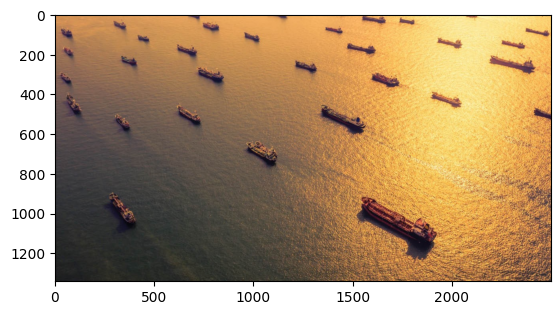

In [3]:
# load img from file system
img = imread("datasets/ships.jpeg")
print(img.shape)
plt.imshow(img)

In [4]:
result_obb_n = model_oob_n(img)
result_obb_l = model_oob_l(img)
result_obb_x = model_oob_x(img)
result_n = model_n(img)
result_x = model_x(img)


0: 576x1024 64.9ms
Speed: 2.9ms preprocess, 64.9ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 1024)

0: 576x1024 357.1ms
Speed: 3.0ms preprocess, 357.1ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 1024)

0: 576x1024 331.3ms
Speed: 2.2ms preprocess, 331.3ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 1024)

0: 352x640 5 boats, 14 birds, 34.3ms
Speed: 1.1ms preprocess, 34.3ms inference, 0.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 8 boats, 219.3ms
Speed: 1.1ms preprocess, 219.3ms inference, 0.8ms postprocess per image at shape (1, 3, 352, 640)


In [5]:
# remove from memory
del model_oob_n, model_oob_l, model_oob_x, model_x

Text(0.5, 1.0, 'YOLOv11_obb_x')

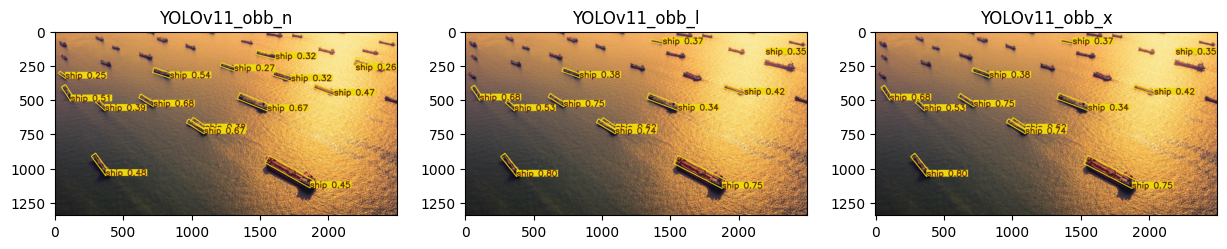

In [6]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(result_obb_n[0].plot())
plt.title("YOLOv11_obb_n")
plt.subplot(1, 3, 2)
plt.imshow(result_obb_l[0].plot())
plt.title("YOLOv11_obb_l")
plt.subplot(1, 3, 3)
plt.imshow(result_obb_x[0].plot())
plt.title("YOLOv11_obb_x")

The biggest $obb model does not perform better on this test image

Text(0.5, 1.0, 'YOLOv11x')

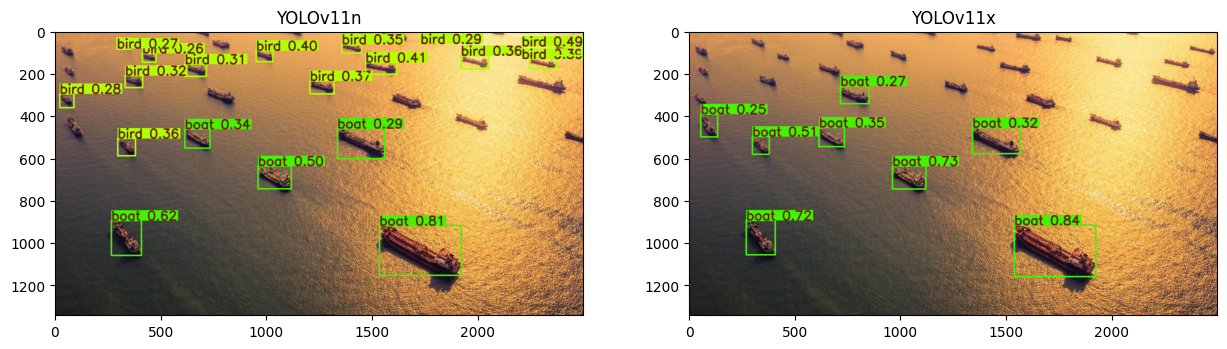

In [7]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.imshow(result_n[0].plot())
plt.title("YOLOv11n")
plt.subplot(2, 2, 2)
plt.imshow(result_x[0].plot())
plt.title("YOLOv11x")

Somehow the smaller YOLOv11N is detecting the boats in the background as bird.

# Prepare the data

In [8]:
def load_images_from_folder(folder, num_images=20, bw=False):
    images = []
    for filename in os.listdir(folder)[:num_images]:
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = imread(os.path.join(folder, filename))
            if img is not None:
                if bw:
                    img_bw = skimage.color.rgb2gray(img)
                    images.append(img_bw)
                else:
                    images.append(img)
    return images

In [9]:
# load 5 images from the dataset
images = load_images_from_folder("datasets/images/train", num_images=5)

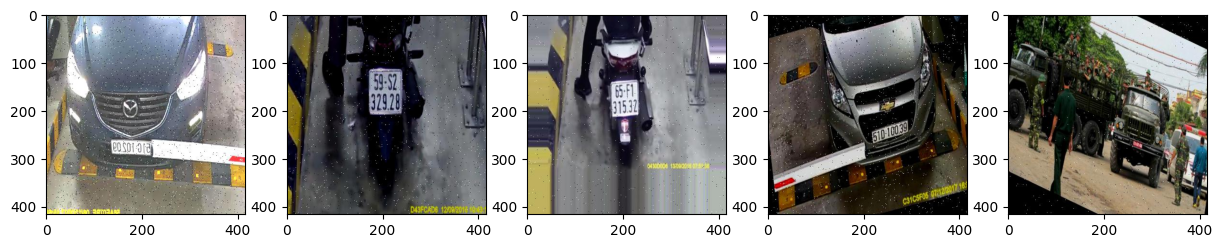

In [10]:
plt.figure(figsize=(15, 15))
for index, img in enumerate(images):
    ax = plt.subplot(5, 5, index + 1)
    ax.imshow(img)

# Make prediction on model without training on license plates
As expected no license plate is detected. But 2 persons and 2 trucks are detected, as the model has been trained on these classes.



0: 640x640 2 persons, 2 trucks, 57.3ms
Speed: 1.5ms preprocess, 57.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


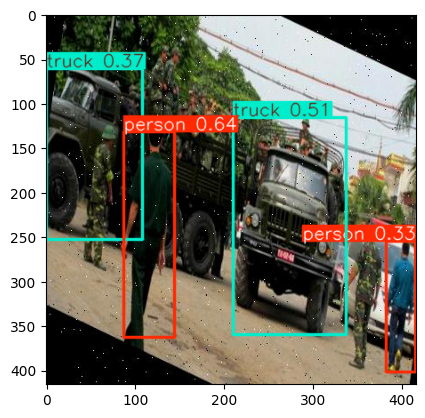

In [11]:
res = model_n(images[4])
plt.imshow(res[0].plot())

# Train the model

In [ ]:
results = model_n.train(
    data='license_plate.yml',  # Path to the YAML file defining the dataset
    epochs=1,  # Number of training epochs
    imgsz=520,  # Image size (resize images to 640x640)
    batch=8,  # Batch size for training
    device="mps",  # use GPU
    project='runs/train_2',  # Directory where training results will be saved
    name='license_plate',  # Name of the run (useful for distinguishing runs)$
)

print("Training completed!")
print("Results saved at:", results.save_dir)

# Evaluate the model

The confusion matrix, performed on the validation set


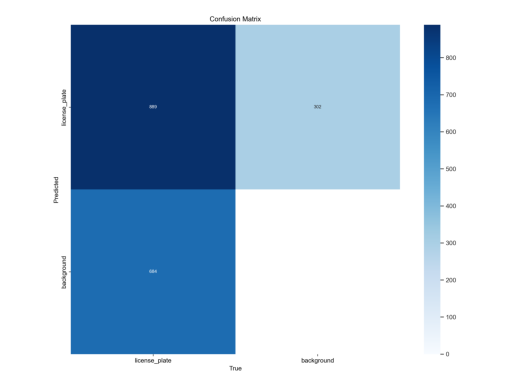

In [12]:
plt.imshow(imread("runs/train/license_plate/confusion_matrix.png"))
plt.axis('off')  # Optional: Turn off axes for a cleaner display
print("The confusion matrix, performed on the validation set")
plt.show()


image 1/1 /Users/davebrunner/Documents/repositories/TSM_CompVis/project_2/datasets/images/test/0c756c9366a8cb10.jpg: 416x544 2 license_plates, 30.5ms
Speed: 1.0ms preprocess, 30.5ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 544)

image 1/1 /Users/davebrunner/Documents/repositories/TSM_CompVis/project_2/datasets/images/test/0cacb08195a3e2d7.jpg: 384x544 1 license_plate, 29.1ms
Speed: 1.1ms preprocess, 29.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 544)


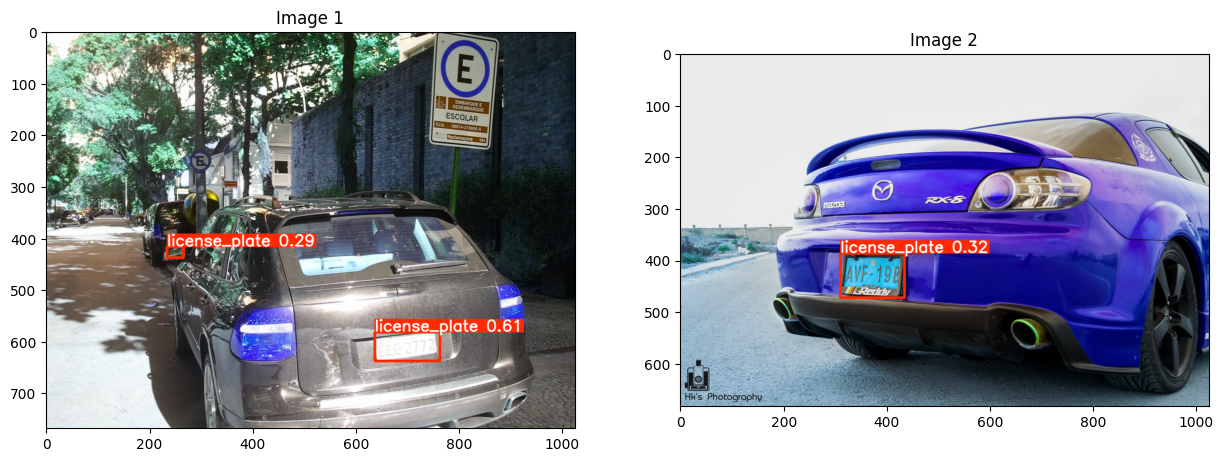

In [13]:
# Load the trained model
trained_model = YOLO('runs/train/license_plate/weights/best.pt')
# Test on two images
result_1 = trained_model('datasets/images/test/0c756c9366a8cb10.jpg')
result_2 = trained_model('datasets/images/test/0cacb08195a3e2d7.jpg')
# Visualize results
plt.figure(figsize=(15, 7))

# Plot the first image
plt.subplot(1, 2, 1)
plt.imshow(result_1[0].plot())
plt.title("Image 1")

# Plot the second image
plt.subplot(1, 2, 2)
plt.imshow(result_2[0].plot())
plt.title("Image 2")

plt.show()

In [14]:
# Load test-images
images = load_images_from_folder("datasets/images/test", num_images=40)
results = []
[results.append(trained_model(img)) for img in images]


0: 480x544 1 license_plate, 36.5ms
Speed: 1.2ms preprocess, 36.5ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 544)

0: 416x544 (no detections), 22.7ms
Speed: 1.4ms preprocess, 22.7ms inference, 0.1ms postprocess per image at shape (1, 3, 416, 544)

0: 416x544 1 license_plate, 21.5ms
Speed: 1.2ms preprocess, 21.5ms inference, 0.2ms postprocess per image at shape (1, 3, 416, 544)

0: 416x544 1 license_plate, 32.2ms
Speed: 1.2ms preprocess, 32.2ms inference, 0.2ms postprocess per image at shape (1, 3, 416, 544)

0: 544x416 (no detections), 21.7ms
Speed: 1.1ms preprocess, 21.7ms inference, 0.1ms postprocess per image at shape (1, 3, 544, 416)

0: 416x544 1 license_plate, 23.4ms
Speed: 1.2ms preprocess, 23.4ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 544)

0: 416x544 1 license_plate, 30.4ms
Speed: 1.3ms preprocess, 30.4ms inference, 0.2ms postprocess per image at shape (1, 3, 416, 544)

0: 384x544 (no detections), 29.4ms
Speed: 1.2ms preprocess, 29.4ms i

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

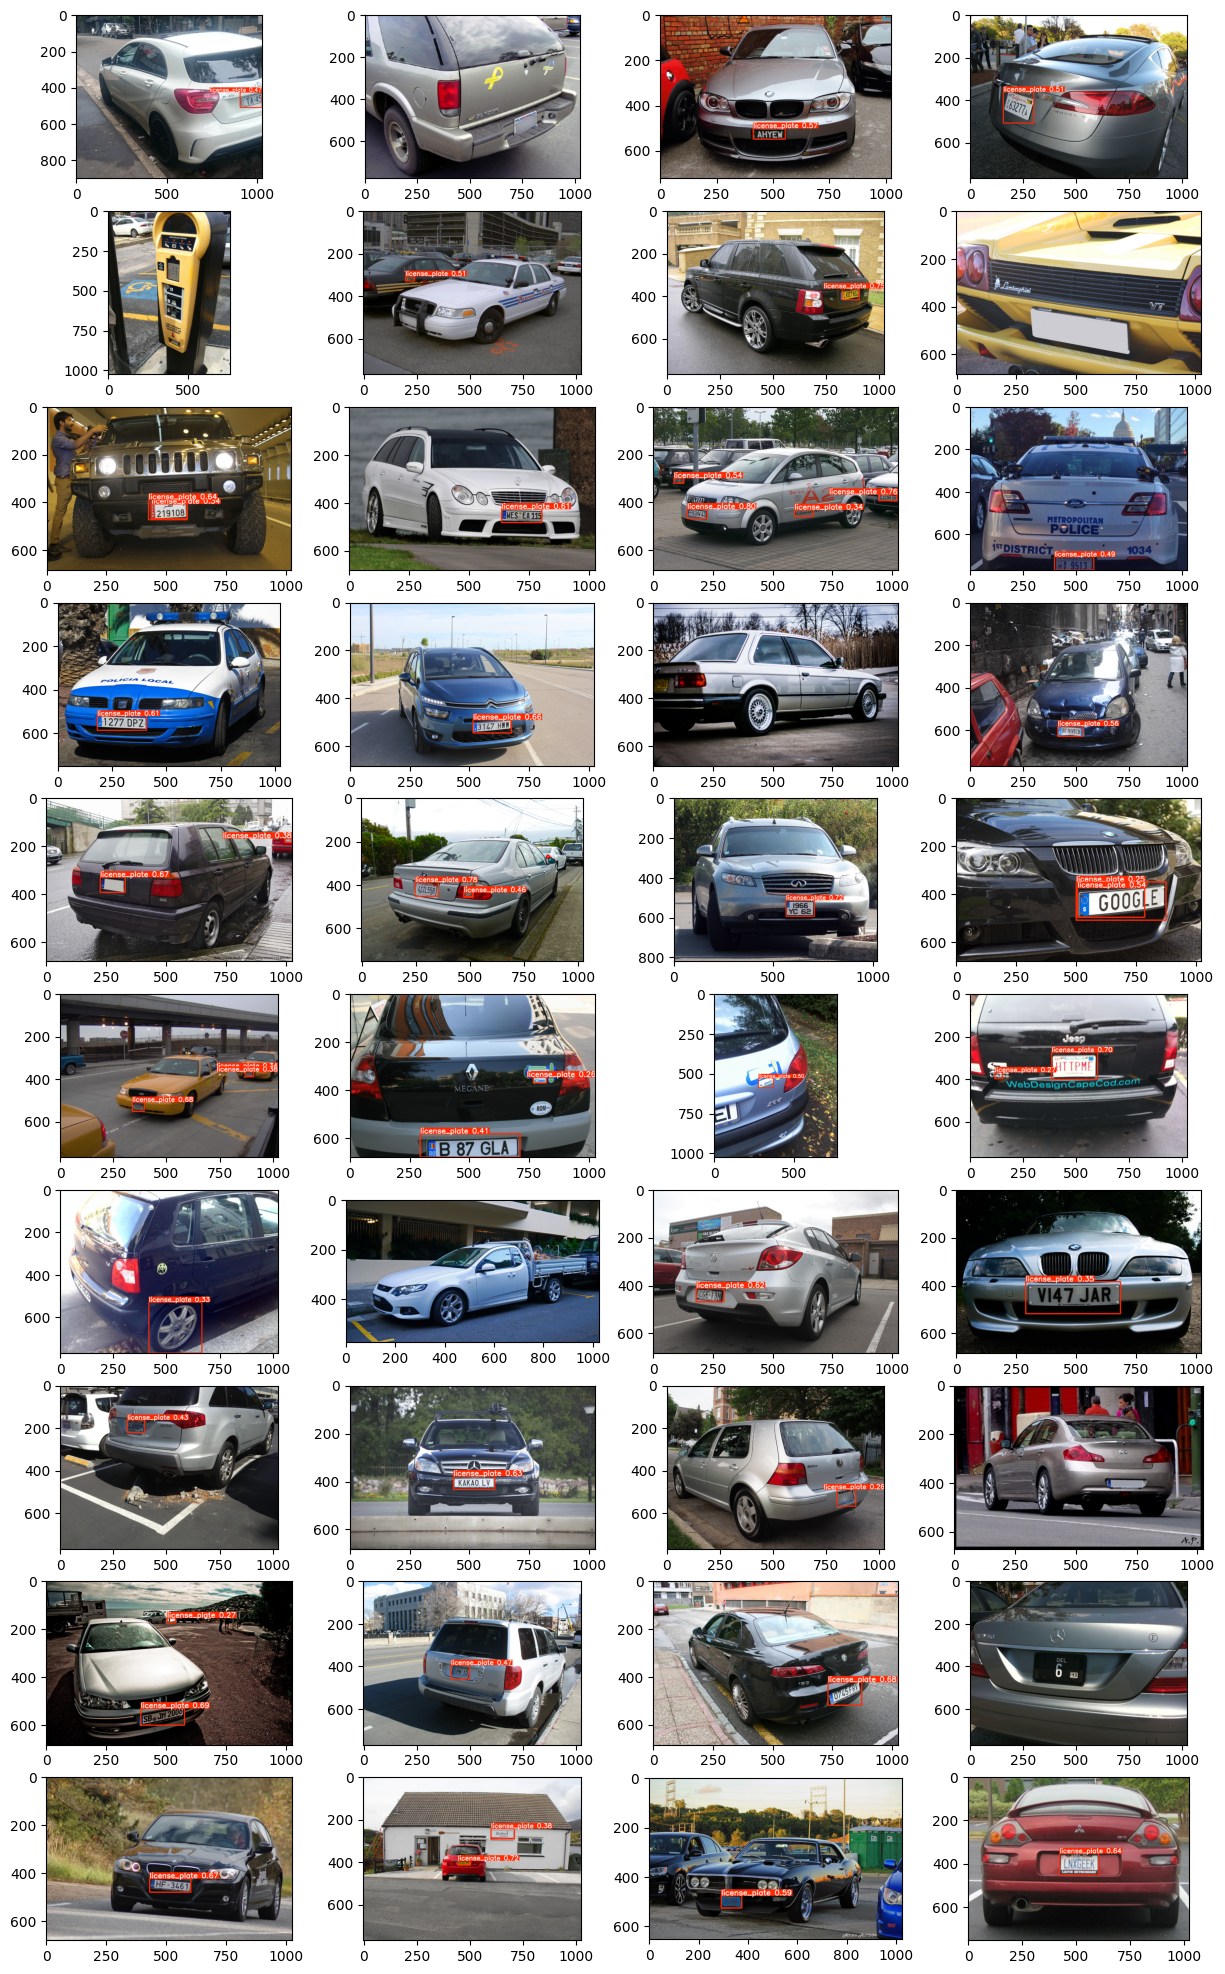

In [15]:
plt.figure(figsize=(15, 25))
for index, img in enumerate(results):
    ax = plt.subplot(10, 4, index + 1)
    ax.imshow(img[0].plot())

When looking at the predictions on the test data, performance is not too bad mostly, it detects the license plates. \n
Sometimes it misclassified painting/numbers on the side of a car as a license plate.